 Clustered Network Epidemics via incorporating social interactions

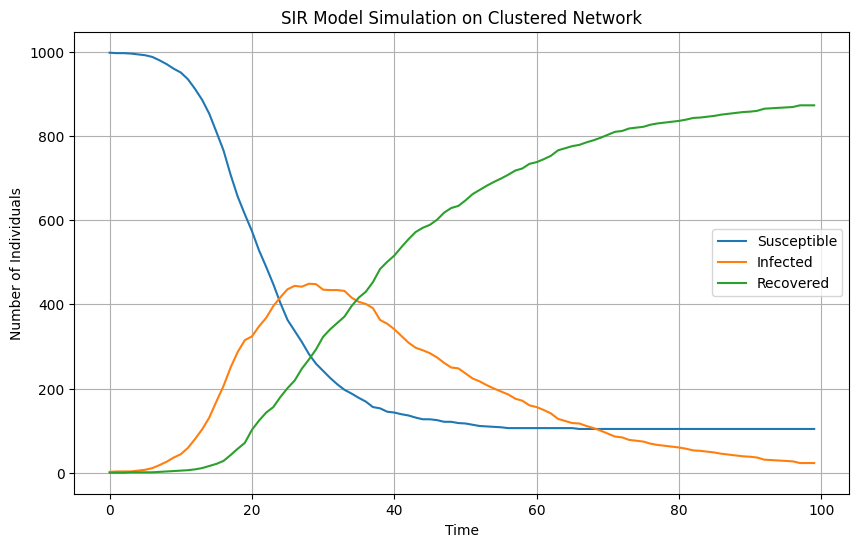

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a clustered network based on the algorithm from the paper
def generate_clustered_network(N, p_triangles, k_i, k_tri):
    G = nx.Graph()

    # Assign degrees for each node
    for node in range(N):
        G.add_node(node)

    # Independent edges (k_i) and triangle edges (k_tri) lists
    independent_stubs = []
    triangle_stubs = []

    # Generate stubs for each node
    for node in range(N):
        independent_stubs.extend([node] * k_i[node])  # k_i independent edges
        triangle_stubs.extend([node] * k_tri[node])   # k_tri triangle edges

    # Create independent edges
    random.shuffle(independent_stubs)
    while len(independent_stubs) > 1:
        u = independent_stubs.pop()
        v = independent_stubs.pop()
        G.add_edge(u, v)

    # Create triangles
    random.shuffle(triangle_stubs)
    while len(triangle_stubs) > 2:
        u = triangle_stubs.pop()
        v = triangle_stubs.pop()
        w = triangle_stubs.pop()
        G.add_edge(u, v)
        G.add_edge(v, w)
        G.add_edge(w, u)

    return G

# Function to simulate SIR model on a network
def SIR_simulation(G, beta, gamma, initial_infected, max_time=100):
    # Initialize node states: 0 -> Susceptible, 1 -> Infected, 2 -> Recovered
    states = {node: 0 for node in G.nodes()}

    # Infect the initial node
    states[initial_infected] = 1
    infected = [initial_infected]  # List of currently infected nodes
    recovered = []

    # Time series for number of infected and recovered
    S_series, I_series, R_series = [], [], []

    for t in range(max_time):
        new_infected = []
        new_recovered = []

        # Infectious phase: Spread the infection
        for node in infected:
            for neighbor in G.neighbors(node):
                if states[neighbor] == 0 and random.random() < beta:  # Susceptible and gets infected
                    new_infected.append(neighbor)
                    states[neighbor] = 1

        # Recovery phase: Infected nodes recover
        for node in infected:
            if random.random() < gamma:  # Infected recovers
                new_recovered.append(node)
                states[node] = 2

        # Update the state of the network
        infected = [node for node in infected if states[node] == 1]  # Remove recovered nodes
        infected.extend(new_infected)
        recovered.extend(new_recovered)

        # Record time series
        S_series.append(sum(1 for state in states.values() if state == 0))
        I_series.append(len(infected))
        R_series.append(len(recovered))

        if len(infected) == 0:  # Stop if no one is infected
            break

    return S_series, I_series, R_series

# Parameters for the network
N = 1000  # Number of nodes
p_triangles = 0.3  # Probability of triangle connections
k_i = np.random.poisson(2, N)  # Independent edges degree
k_tri = np.random.poisson(1, N)  # Triangle edges degree

# Generate clustered network
G = generate_clustered_network(N, p_triangles, k_i, k_tri)

# Parameters for the SIR model
beta = 0.1  # Infection probability
gamma = 0.05  # Recovery probability
initial_infected = random.randint(0, N - 1)  # Randomly choose the first infected node

# Simulate the epidemic
S_series, I_series, R_series = SIR_simulation(G, beta, gamma, initial_infected)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S_series, label='Susceptible')
plt.plot(I_series, label='Infected')
plt.plot(R_series, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation on Clustered Network')
plt.legend()
plt.grid(True)
plt.show()


taking clustering coefficient into account

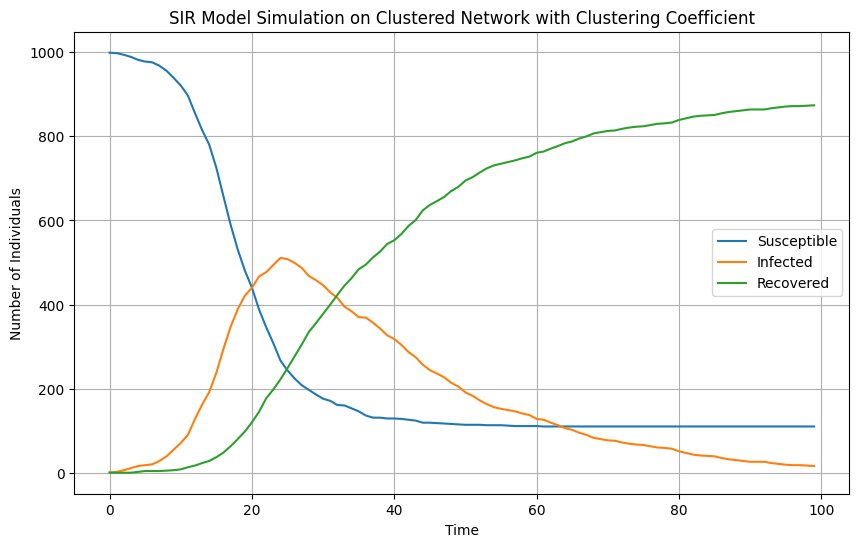

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a clustered network based on the algorithm from the paper
def generate_clustered_network(N, p_triangles, k_i, k_tri):
    G = nx.Graph()

    # Assign degrees for each node
    for node in range(N):
        G.add_node(node)

    # Independent edges (k_i) and triangle edges (k_tri) lists
    independent_stubs = []
    triangle_stubs = []

    # Generate stubs for each node
    for node in range(N):
        independent_stubs.extend([node] * k_i[node])  # k_i independent edges
        triangle_stubs.extend([node] * k_tri[node])   # k_tri triangle edges

    # Create independent edges
    random.shuffle(independent_stubs)
    while len(independent_stubs) > 1:
        u = independent_stubs.pop()
        v = independent_stubs.pop()
        G.add_edge(u, v)

    # Create triangles
    random.shuffle(triangle_stubs)
    while len(triangle_stubs) > 2:
        u = triangle_stubs.pop()
        v = triangle_stubs.pop()
        w = triangle_stubs.pop()
        G.add_edge(u, v)
        G.add_edge(v, w)
        G.add_edge(w, u)

    return G

# Function to simulate SIR model on a network with clustering coefficient
def SIR_simulation_with_clustering(G, beta, gamma, C, initial_infected, max_time=100):
    # Initialize node states: 0 -> Susceptible, 1 -> Infected, 2 -> Recovered
    states = {node: 0 for node in G.nodes()}

    # Infect the initial node
    states[initial_infected] = 1
    infected = [initial_infected]  # List of currently infected nodes
    recovered = []

    # Time series for number of infected and recovered
    S_series, I_series, R_series = [], [], []

    for t in range(max_time):
        new_infected = []
        new_recovered = []

        # Infectious phase: Spread the infection
        for node in infected:
            for neighbor in G.neighbors(node):
                # Adjust infection probability using clustering coefficient
                if states[neighbor] == 0:  # Only infect susceptible neighbors
                    prob_infection = beta * (1 + C)  # Adjusting based on C
                    if random.random() < prob_infection:  # Susceptible and gets infected
                        new_infected.append(neighbor)
                        states[neighbor] = 1

        # Recovery phase: Infected nodes recover
        for node in infected:
            if random.random() < gamma:  # Infected recovers
                new_recovered.append(node)
                states[node] = 2

        # Update the state of the network
        infected = [node for node in infected if states[node] == 1]  # Remove recovered nodes
        infected.extend(new_infected)
        recovered.extend(new_recovered)

        # Record time series
        S_series.append(sum(1 for state in states.values() if state == 0))
        I_series.append(len(infected))
        R_series.append(len(recovered))

        if len(infected) == 0:  # Stop if no one is infected
            break

    return S_series, I_series, R_series

# Parameters for the network
N = 1000  # Number of nodes
p_triangles = 0.3  # Probability of triangle connections
k_i = np.random.poisson(2, N)  # Independent edges degree
k_tri = np.random.poisson(1, N)  # Triangle edges degree

# Generate clustered network
G = generate_clustered_network(N, p_triangles, k_i, k_tri)

# Calculate clustering coefficient for the network
C = nx.average_clustering(G)

# Parameters for the SIR model
beta = 0.1  # Infection probability
gamma = 0.05  # Recovery probability
initial_infected = random.randint(0, N - 1)  # Randomly choose the first infected node

# Simulate the epidemic with clustering coefficient
S_series, I_series, R_series = SIR_simulation_with_clustering(G, beta, gamma, C, initial_infected)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(S_series, label='Susceptible')
plt.plot(I_series, label='Infected')
plt.plot(R_series, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation on Clustered Network with Clustering Coefficient')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(C)

0.14859065656565645


effect of changing clustering coefficient

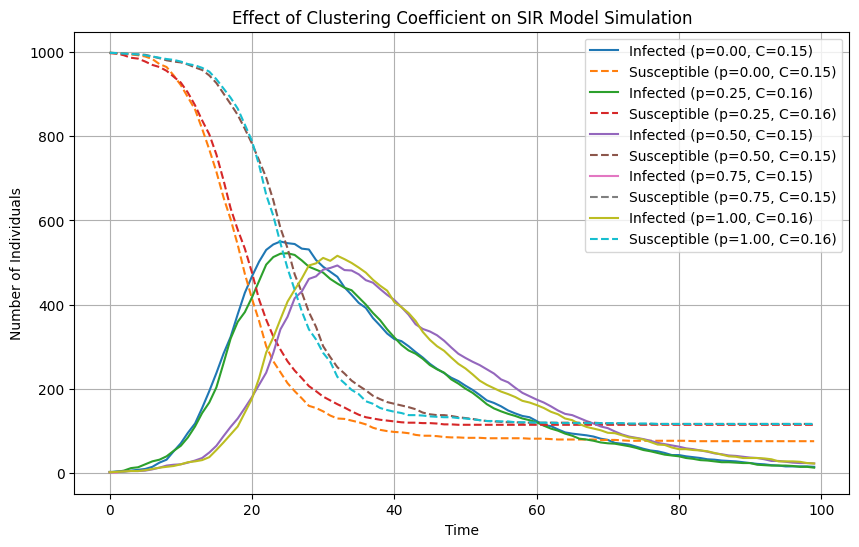

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a clustered network based on the algorithm from the paper
def generate_clustered_network(N, p_triangles, k_i, k_tri):
    G = nx.Graph()

    # Assign degrees for each node
    for node in range(N):
        G.add_node(node)

    # Independent edges (k_i) and triangle edges (k_tri) lists
    independent_stubs = []
    triangle_stubs = []

    # Generate stubs for each node
    for node in range(N):
        independent_stubs.extend([node] * k_i[node])  # k_i independent edges
        triangle_stubs.extend([node] * k_tri[node])   # k_tri triangle edges

    # Create independent edges
    random.shuffle(independent_stubs)
    while len(independent_stubs) > 1:
        u = independent_stubs.pop()
        v = independent_stubs.pop()
        G.add_edge(u, v)

    # Create triangles
    random.shuffle(triangle_stubs)
    while len(triangle_stubs) > 2:
        u = triangle_stubs.pop()
        v = triangle_stubs.pop()
        w = triangle_stubs.pop()
        G.add_edge(u, v)
        G.add_edge(v, w)
        G.add_edge(w, u)

    return G

# Function to simulate SIR model on a network with clustering coefficient
def SIR_simulation_with_clustering(G, beta, gamma, C, initial_infected, max_time=100):
    # Initialize node states: 0 -> Susceptible, 1 -> Infected, 2 -> Recovered
    states = {node: 0 for node in G.nodes()}

    # Infect the initial node
    states[initial_infected] = 1
    infected = [initial_infected]  # List of currently infected nodes
    recovered = []

    # Time series for number of infected and recovered
    S_series, I_series, R_series = [], [], []

    for t in range(max_time):
        new_infected = []
        new_recovered = []

        # Infectious phase: Spread the infection
        for node in infected:
            for neighbor in G.neighbors(node):
                # Adjust infection probability using clustering coefficient
                if states[neighbor] == 0:  # Only infect susceptible neighbors
                    prob_infection = beta * (1 + C)  # Adjusting based on C
                    if random.random() < prob_infection:  # Susceptible and gets infected
                        new_infected.append(neighbor)
                        states[neighbor] = 1

        # Recovery phase: Infected nodes recover
        for node in infected:
            if random.random() < gamma:  # Infected recovers
                new_recovered.append(node)
                states[node] = 2

        # Update the state of the network
        infected = [node for node in infected if states[node] == 1]  # Remove recovered nodes
        infected.extend(new_infected)
        recovered.extend(new_recovered)

        # Record time series
        S_series.append(sum(1 for state in states.values() if state == 0))
        I_series.append(len(infected))
        R_series.append(len(recovered))

        if len(infected) == 0:  # Stop if no one is infected
            break

    return S_series, I_series, R_series

# Parameters for the network
N = 1000  # Number of nodes
num_simulations = 5  # Number of simulations with different clustering coefficients
beta = 0.1  # Infection probability
gamma = 0.05  # Recovery probability
initial_infected = random.randint(0, N - 1)  # Randomly choose the first infected node

# Prepare to plot results
plt.figure(figsize=(10, 6))

# Run simulations for different triangle connection probabilities
for p_triangles in np.linspace(0, 1, num_simulations):
    k_i = np.random.poisson(2, N)  # Independent edges degree
    k_tri = np.random.poisson(1, N)  # Triangle edges degree

    # Generate clustered network
    G = generate_clustered_network(N, p_triangles, k_i, k_tri)

    # Calculate clustering coefficient for the network
    C = nx.average_clustering(G)

    # Simulate the epidemic with clustering coefficient
    S_series, I_series, R_series = SIR_simulation_with_clustering(G, beta, gamma, C, initial_infected)

    # Plot the results for susceptible and infected
    plt.plot(I_series, label=f'Infected (p={p_triangles:.2f}, C={C:.2f})')
    plt.plot(S_series, label=f'Susceptible (p={p_triangles:.2f}, C={C:.2f})', linestyle='--')

# Customize plot
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('Effect of Clustering Coefficient on SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()
